<a href="https://colab.research.google.com/github/TonioFlag/Teoria-de-Colas-y-Simulacion/blob/main/Caso-2/Analisis-de-entrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1.15!pip install pingouin -q
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal, f_oneway, anderson, expon, kstest, cramervonmises
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
# @title Limpieza de datos de forma inicial
base = pd.read_excel("Caso 2024 Walmart.xlsx")
base["Order Date"] = base["Order Date"].astype(str)
base["Unnamed: 2"] = base["Order Date"] + " " + base["Unnamed: 2"]
base["Order Date"] = pd.to_datetime(base["Unnamed: 2"], format="%Y-%m-%d %H:%M:%S")
base = base.drop("Unnamed: 2", axis = 1)
base["Dia Semana"] = base["Order Date"].dt.dayofweek
base["Hora"] = base["Order Date"].dt.hour
base.sort_values(by ="Order Date",inplace=True, ascending=True)
base = base.reset_index(drop="index")
base["TA"] = base["Order Date"].diff().dt.total_seconds()/60
base["TA"][0] = 54/60
base["Total Compra"] = base['Product Category 1 (Quantity)'] + base['Product Category 2 (Quantity)'] + base['Product Category 3 (Quantity)'] + base['Product Category 4 (Quantity)'] + base['Product Category 5 (Quantity)'] + base['Product Category 6 (Quantity)'] + base['Product Category 7 (Quantity)'] + base['Product Category 8 (Quantity)'] + base['Product Category 9 (Quantity)'] + base['Product Category 10 (Quantity)'] + base['Product Category 11 (Quantity)'] + base['Product Category 12 (Quantity)'] + base['Product Category 13 (Quantity)'] + base['Product Category 14 (Quantity)'] + base['Product Category 15 (Quantity)'] + base['Product Category 16 (Quantity)'] + base['Product Category 17 (Quantity)'] + base['Product Category 18 (Quantity)']

<ipython-input-2-25edd188cc3a>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  base["TA"][0] = 54/60
<ipython-input-2-25edd188cc3a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

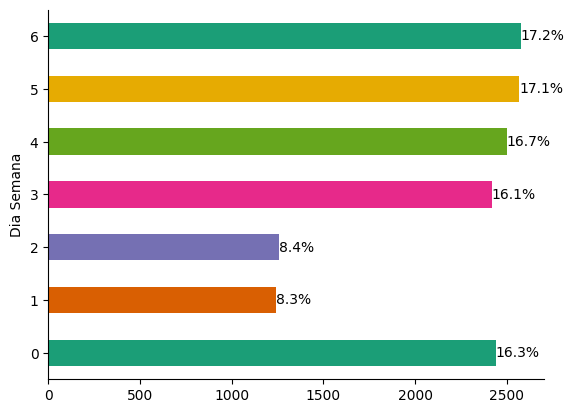

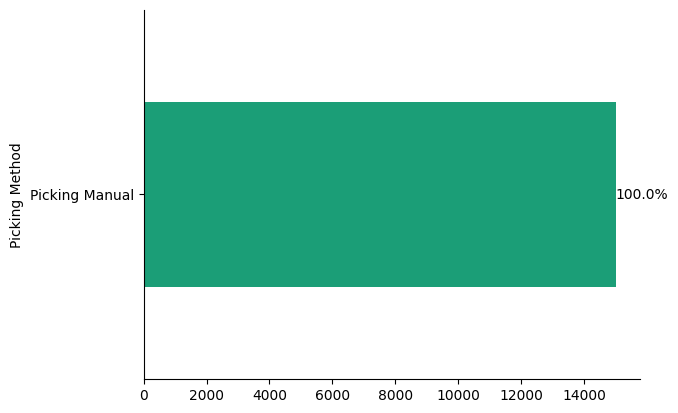

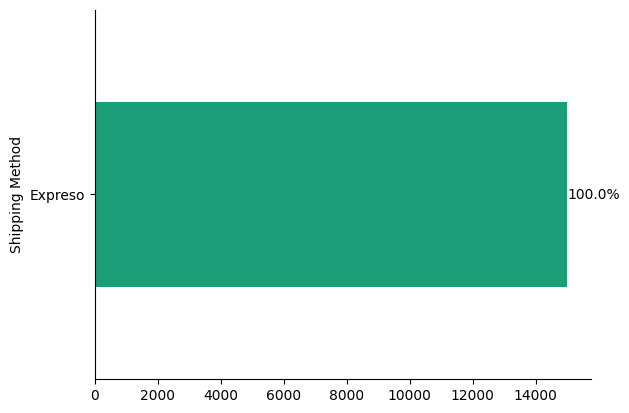

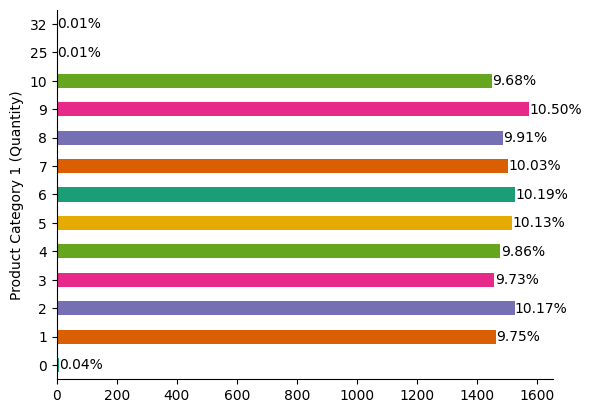

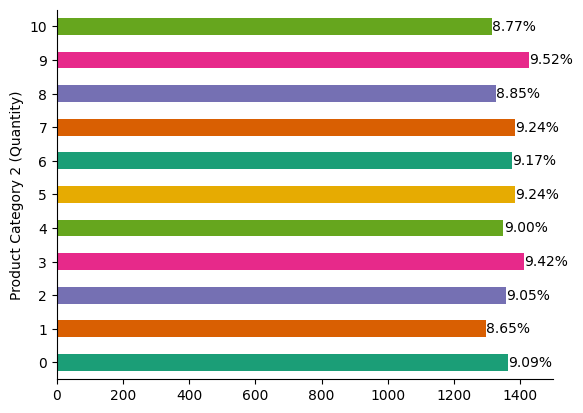

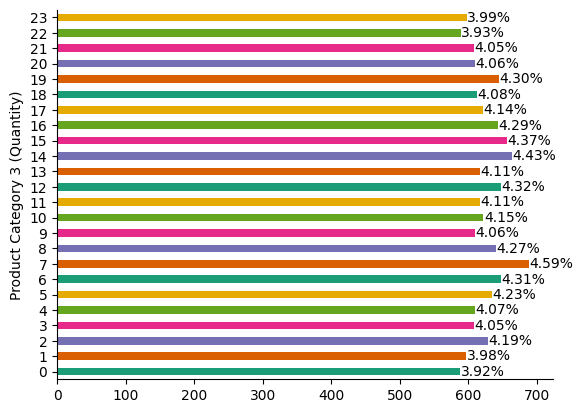

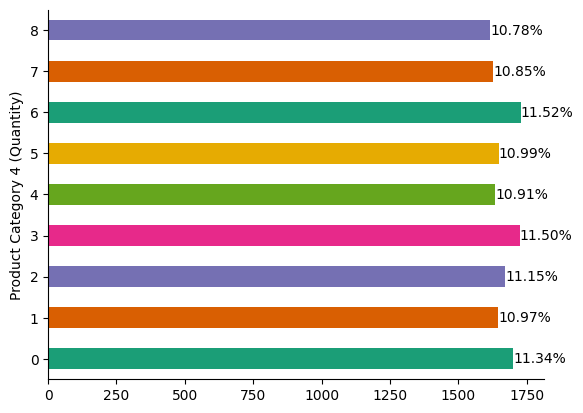

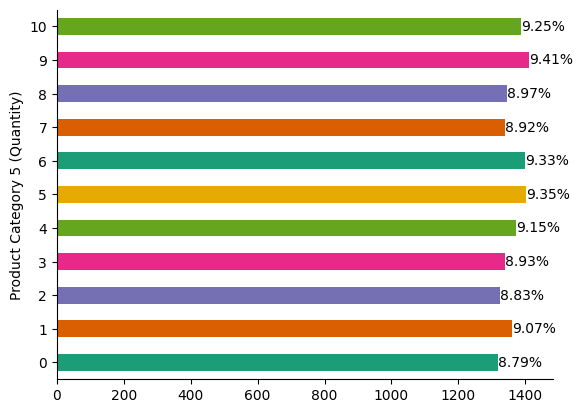

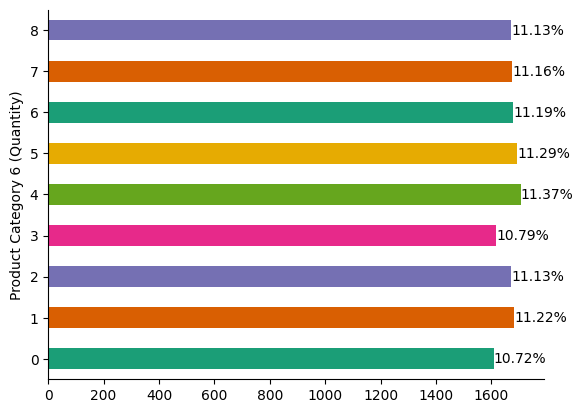

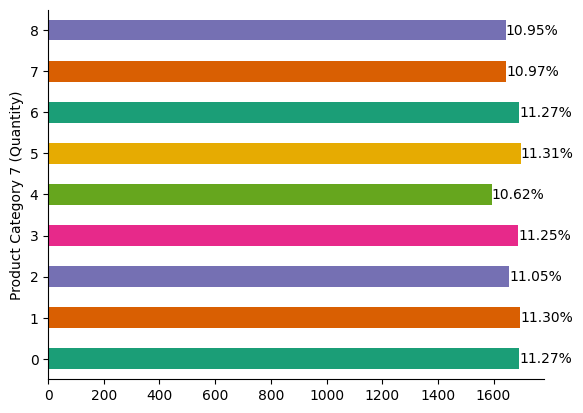

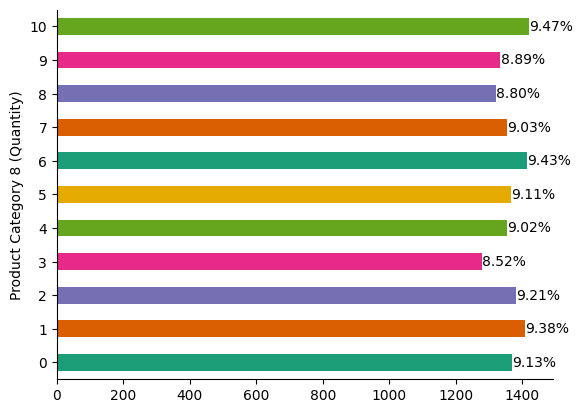

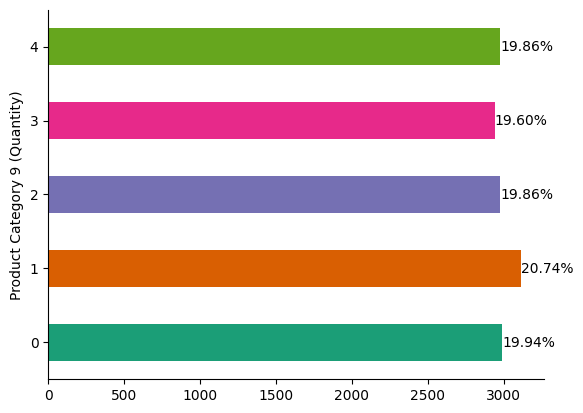

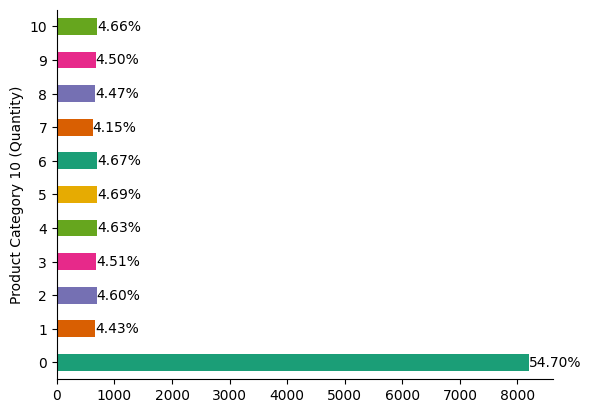

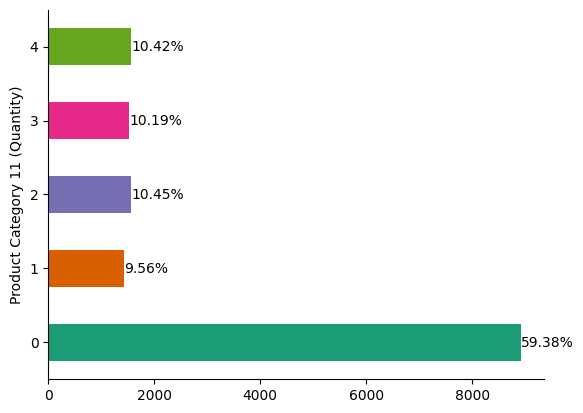

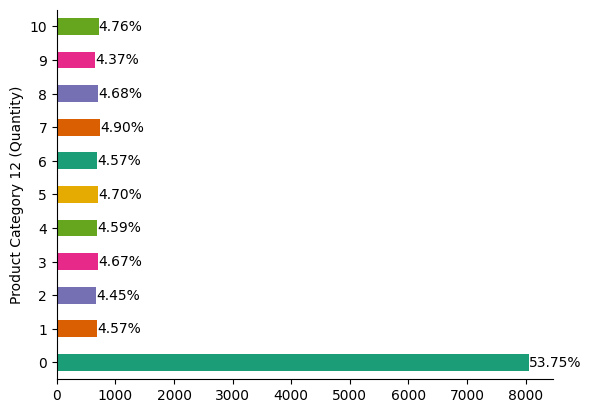

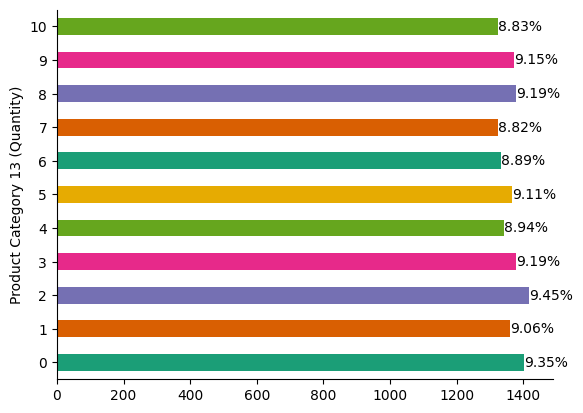

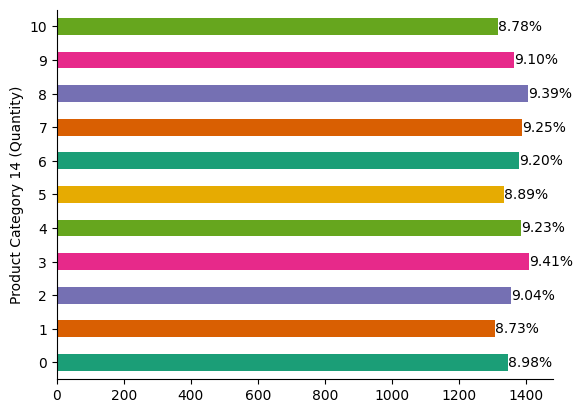

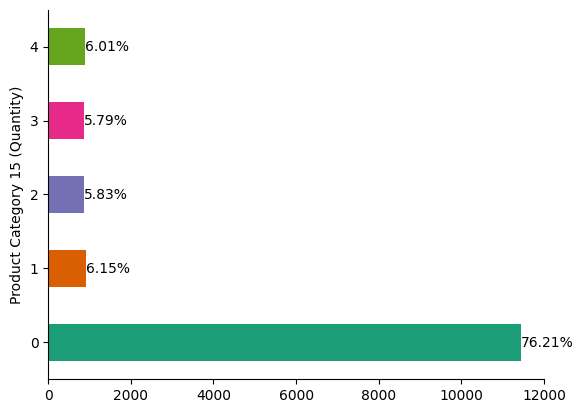

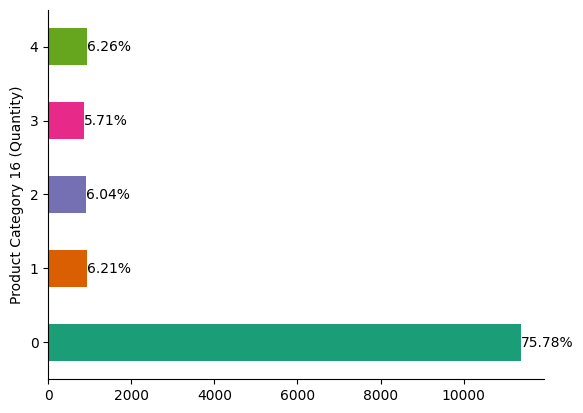

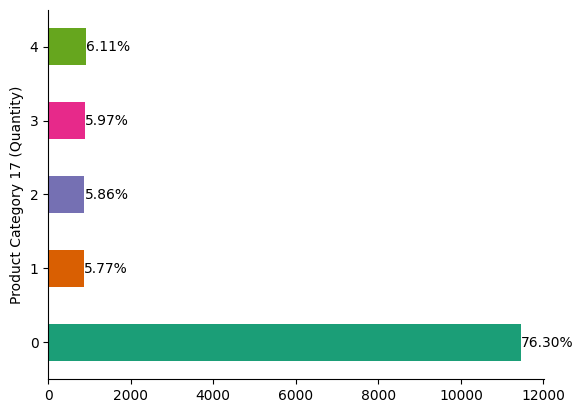

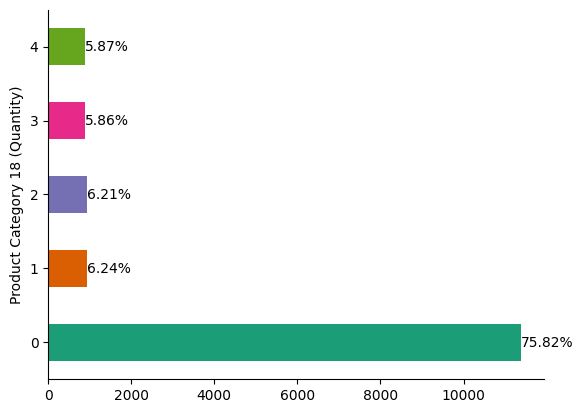

In [ ]:
# @title Descripción de los datos
rta = base[["Processing Time (hours)","TA"]].describe()

'''
Gráfico de eventos por día de la semana,
se identifica que por el largo de la muestra solo se presenta un martes y miercoles.
'''
counts = base.groupby('Dia Semana').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

'''
Se presenta unicamente un tipo de Picking y shiping
'''
counts = base.groupby('Picking Method').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

counts = base.groupby('Shipping Method').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

for j in range(1, 19, 1):
  columna = f"Product Category {j} (Quantity)"
  counts = base.groupby(columna).size()
  percentages = counts / counts.sum() * 100
  ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

  for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.2f}%', va='center', ha='left', color='black')

  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.show()

In [ ]:
# @title Descripcion de los productos

filt = []
for j in range(1, 19, 1):
  columna = f"Product Category {j} (Quantity)"
  filt.append(columna)

base[filt].describe()

Product Category 1 (Quantity)  Product Category 2 (Quantity)  \
count                   15000.000000                    15000.00000   
mean                        5.516400                        5.01020   
std                         2.877108                        3.14839   
min                         0.000000                        0.00000   
25%                         3.000000                        2.00000   
50%                         6.000000                        5.00000   
75%                         8.000000                        8.00000   
max                        32.000000                       10.00000   

       Product Category 3 (Quantity)  Product Category 4 (Quantity)  \
count                   15000.000000                   15000.000000   
mean                       11.487400                       3.976133   
std                         6.844562                       2.575734   
min                         0.000000                       0.000000   
25%                         6.000000                       2.000000   
50%                        12.000000                       4.000000   
75%                        17.000000                       6.000000   
max                        23.000000                       8.000000   

       Product Category 5 (Quantity)  Product Category 6 (Quantity)  \
count                   15000.000000                   15000.000000   
mean                        5.042867                       4.020933   
std                         3.156891                       2.573818   
min                         0.000000                       0.000000   
25%                         2.000000                       2.000000   
50%                         5.000000                       4.000000   
75%                         8.000000                       6.000000   
max                        10.000000                       8.000000   

       Product Category 7 (Quantity)  Product Category 8 (Quantity)  \
count                   15000.000000                   15000.000000   
mean                        3.982333                       4.999600   
std                         2.584350                       3.175385   
min                         0.000000                       0.000000   
25%                         2.000000                       2.000000   
50%                         4.000000                       5.000000   
75%                         6.000000                       8.000000   
max                         8.000000                      10.000000   

       Product Category 9 (Quantity)  Product Category 10 (Quantity)  \
count                   15000.000000                    15000.000000   
mean                        1.987000                        2.489933   
std                         1.412574                        3.350340   
min                         0.000000                        0.000000   
25%                         1.000000                        0.000000   
50%                         2.000000                        0.000000   
75%                         3.000000                        5.000000   
max                         4.000000                       10.000000   

       Product Category 11 (Quantity)  Product Category 12 (Quantity)  \
count                    15000.000000                    15000.000000   
mean                         1.027067                        2.554000   
std                          1.429337                        3.371959   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          2.000000                        5.000000   
max                          4.000000                       10.000000   

       Product Category 13 (Quantity)  Product Category 14 (Quantity)  \
count                    15000.000000                    15000.0000

In [ ]:
# @title Funciones para el procesamiento de datos.

def dispercion(df, j, variables):
  '''
    Hace el gráfico de dispersión por diferentes grupos,
    recibe df que es el dataframe que contiene los datos que se van a gráficar y las varables por las que se separa,
    recibe el parametro j que es el nombre de la variable en la base de datos,
    recibe un array de las variables para iterar por ellas de maximo 5
    Devuelve la gráfica del largo del array de las varables a iterar.
  '''
  fig, axes = plt.subplots(1, len(variables), figsize=(5*len(variables), 5))
  for i, variable in enumerate(variables):
        ax = axes[i]
        for categoria in df[variable].unique():
            x = len(df[(df[variable] == categoria)][j]) - 1
            ax.scatter(
                df[(df[variable] == categoria)][j][:x],
                df[(df[variable] == categoria)][j][1:],
                label=f"{categoria}", s=8, alpha=0.7
            )
        ax.set_title(f"Dispersión por {variable}")
        ax.set_xlabel(f"{j} (t)")
        ax.set_ylabel(f"{j} (t+1)")
        ax.legend(title=variable)

  plt.tight_layout()
  plt.show()

def dispercionUnica(df, j):
    '''
    Hace el gráfico de dispersión para una sola variable.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - j: Nombre de la variable en la base de datos que se va a graficar.

    Devuelve la gráfica de dispersión para la variable especificada.
    '''
    plt.figure(figsize=(8, 6))

    # Graficar la dispersión de j(t) vs j(t+1)
    x = len(df[j]) - 1
    plt.scatter(
        df[j][:x],  # j(t)
        df[j][1:],  # j(t+1)
        s=8, alpha=0.7
    )

    plt.title(f"Dispersión de {j}")
    plt.xlabel(f"{j} (t)")
    plt.ylabel(f"{j} (t+1)")

    plt.tight_layout()
    plt.show()

def dispercionDependencia(df, j, z, variables):
  fig, axes = plt.subplots(1, len(variables), figsize=(5*len(variables), 5))
  for i, variable in enumerate(variables):
        ax = axes[i]
        for categoria in df[variable].unique():
            x = len(df[(df[variable] == categoria)][j]) - 1
            ax.scatter(
                df[(df[variable] == categoria)][j],
                df[(df[variable] == categoria)][z],
                label=f"{categoria}", s=8, alpha=0.7
            )
        ax.set_title(f"Dispersión por {variable}")
        ax.set_xlabel(f"{j} (t)")
        ax.set_ylabel(f"{z} (t)")
        ax.legend(title=variable)

def graficos_QQPLOT(df, variable):
  distribuciones = ["norm", "expon", "logistic", "gumbel_l", "uniform"]
  fig, axes = plt.subplots(1, 5, figsize=(16, 4))
  for i, distribucion in enumerate(distribuciones):
    ax = axes[i]
    ax = pg.qqplot(df[variable], dist=distribucion, ax=ax)
    ax.set_title(f"QQ Plot para {distribucion}")
    if i == 0:
      ax.set_ylabel(f"Cuantiles ordenados")
    else:
      ax.set_ylabel("")
    ax.set_xlabel("Cuantiles Teoricos")
  plt.tight_layout()
  plt.show()

def pruebas_independencia(df, var1, var2):

    resultado = pg.chi2_independence(x= var1, y=var2, data=df)[2]
    for i, row in resultado.iterrows():
      p = row['pval']
      pasa = 'Sí' if p > 0.05 else 'No'
      test = row["test"]
      resultado2 = row['chi2']
      dof = row['dof']
      if test == 'freeman-tukey' or test == 'mod-log-likelihood' or test == "neyman":
        None
      else:
        resultados.append(["Independencia",f'{test}', f'{var1} vs {var2}', resultado2, dof, p, pasa])

def pruebas_homogeneidad(df, grupo, variable):
    grupos = df[grupo].unique()
    if len(grupos) == 2:
        datos1 = df[df[grupo] == grupos[0]][variable]
        datos2 = df[df[grupo] == grupos[1]][variable]
        resultado = pg.mwu(datos1, datos2, alternative='two-sided')
        p = resultado['p-val'][0]
        pasa = 'Sí' if p > 0.05 else 'No'
        resultados.append(["homogeneidad",'Mann-Whitney U', f'{grupos[0]} vs {grupos[1]} (en {variable})', f"U={resultado['U-val'][0]:.2f}", p, pasa])
    elif len(grupos) >= 2:
        datos = [df[df[grupo] == g][variable] for g in grupos]
        stat, p = kruskal(*datos)
        pasa = 'Sí' if p > 0.05 else 'No'
        resultados.append(["Medias", "Kruskal-Wallis", f'{grupo} para {variable}', stat, p, pasa])
        stat, p = f_oneway(*datos)
        pasa = 'Sí' if p > 0.05 else 'No'
        resultados.append(["Medias",'ANOVA', f'{grupo} para {variable}', stat, p, pasa])
        homones = pg.homoscedasticity(df, dv=variable, group=grupo)
        pasa = "Sí" if homones['equal_var'].iloc[0] else "No"
        resultados.append(["Varianzas", "Homoscedasticity", f'{grupo} para {variable}', homones["W"].iloc[0], homones['pval'].iloc[0], pasa])
        homones = pg.homoscedasticity(df, dv=variable, group=grupo, method="levene", alpha = 0.05)
        pasa = "Sí" if homones['equal_var'].iloc[0] else "No"
        resultados.append(["Varianzas", "Levene", f'{grupo} para {variable}', homones["W"].iloc[0], homones['pval'].iloc[0], pasa])
        homones = pg.homoscedasticity(df, dv=variable, group=grupo, method="bartlett", alpha = 0.05)
        pasa = "Sí" if homones['equal_var'].iloc[0] else "No"
        resultados.append(["Varianzas", "Bartlett", f'{grupo} para {variable}', homones["T"].iloc[0], homones['pval'].iloc[0], pasa])

def prueba_ks(df, variable):
    distribuciones = ["norm", "expon", "logistic", "gumbel_l", "gumbel_r"]
    datos = df[variable]

    resultados = []
    for dist in distribuciones:
        try:
            params = getattr(stats, dist).fit(datos)

            stat = kstest(datos, dist, args=params)

            pasa = 'Sí' if stat.pvalue > 0.05 else 'No'
            resultados.append([
                "Ajuste", "Kolmogorov-Smirnov", f"{variable} vs distribución {dist}",
                stat.statistic, stat.pvalue, pasa, params
            ])
        except Exception as e:
            resultados.append(["Ajuste", "Kolmogorov-Smirnov", f"{variable} vs distribución {dist}", "Error", str(e), "Error",""])

    resultados_df = pd.DataFrame(resultados, columns=["Tipo", "Prueba", "Comparación", "Estadistico", "p-val", "Pasa","Parametro"])
    return resultados_df

def verosimilitudes(df, variable):
    """
    Evalúa el ajuste de múltiples distribuciones usando AIC y BIC.

    Args:
        df (DataFrame): DataFrame de pandas con los datos.
        variable (str): Nombre de la columna a analizar.

    Returns:
        DataFrame: Resultados con AIC y BIC para cada distribución.
    """
    distribuciones = [
        "norm", "expon", "logistic", "gamma",
        "weibull_min", "lognorm", "beta", "uniform"
    ]

    datos = df[variable].dropna()
    n = len(datos)
    resultados = []

    for dist_name in distribuciones:
        try:
            # Obtener la distribución de scipy.stats
            distribucion = getattr(stats, dist_name)

            # Ajustar parámetros a los datos
            params = distribucion.fit(datos)

            # Calcular log-verosimilitud
            log_likelihood = np.sum(distribucion.logpdf(datos, *params))

            # Número de parámetros (k)
            k = len(params)

            # Calcular AIC y BIC
            aic = 2 * k - 2 * log_likelihood
            bic = k * np.log(n) - 2 * log_likelihood

            resultados.append([
                dist_name,
                aic,
                bic,
                k,
                params,
                log_likelihood
            ])

        except Exception as e:
            resultados.append([dist_name, np.nan, np.nan, np.nan, str(e), np.nan])

    # Crear DataFrame con resultados
    resultados_df = pd.DataFrame(
        resultados,
        columns=["Distribución", "AIC", "BIC", "Parámetros (k)", "Parámetros", "Log-Verosimilitud"]
    )

    # Ordenar por AIC (mejor ajuste primero)
    resultados_df = resultados_df.sort_values(by="AIC").reset_index(drop=True)

    return resultados_df

def pp_plot(df, variable, dist_names=["expon", "norm", "logistic"], max_plots=5):
    datos = df[variable]
    num_dists = min(len(dist_names), max_plots)

    fig, axes = plt.subplots(1, num_dists, figsize=(7 * num_dists, 7))

    if num_dists == 1:
        axes = [axes]  # Asegurar que 'axes' sea iterable si hay un solo gráfico

    for i, dist_name in enumerate(dist_names[:max_plots]):
        dist = getattr(stats, dist_name)
        params = dist.fit(datos)

        # Obtener la CDF empírica y teórica
        cdf_empirica = np.sort(stats.rankdata(datos) / len(datos))  # CDF empírica
        cdf_teorica = dist.cdf(np.sort(datos), *params)  # CDF teórica

        axes[i].scatter(cdf_teorica, cdf_empirica, c='blue', alpha=0.7, s=130)
        axes[i].plot([0,1], [0,1], 'r--', linewidth=2.5)

        # Ajustar tamaños de los textos
        axes[i].set_xlabel("Cuantiles Teóricos", fontsize=26)
        axes[i].set_title(f"P-P Plot: {dist_name}", fontsize=40)

        axes[i].tick_params(axis='both', which='major', labelsize=24)
        axes[i].grid(True, linestyle='--', alpha=0.5)

    axes[0].set_ylabel("Cuantiles Empíricos", fontsize=26)
    plt.tight_layout()
    plt.show()

def prueba_cv_exponencial(df, variable):
    datos = df[variable]

    # Ajuste y transformación
    loc, scale = stats.expon.fit(datos)
    datos_transformados = (datos - loc) / scale

    # Prueba Cramér-von Mises
    resultado = cramervonmises(datos_transformados, "expon")

    pasa = 'Sí' if resultado.pvalue > 0.05 else 'No'
    return {
        "Prueba": "Cramér-von Mises",
        "Estadístico": resultado.statistic,
        "p-valor": resultado.pvalue,
        "Pasa la prueba": pasa
    }

def sacar_informacion(resultados, nombre):
    if not os.path.exists("Pruebas.xlsx"):
        with pd.ExcelWriter("Pruebas.xlsx") as writer:
            resultados.to_excel(writer, sheet_name=nombre, index=False)
    else:
        with pd.ExcelWriter("Pruebas.xlsx", engine='openpyxl', mode='a') as writer:
            resultados.to_excel(writer, sheet_name=nombre, index=False)

In [ ]:
base["TA"].describe()

count    15000.000000
mean         1.151971
std          1.151190
min          0.000000
25%          0.333333
50%          0.783333
75%          1.600000
max         10.733333
Name: TA, dtype: float64

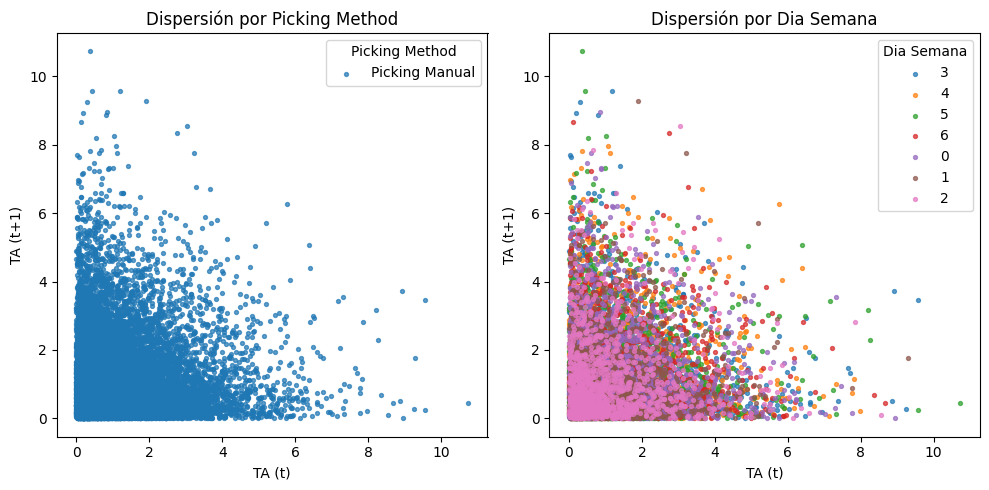

/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {n

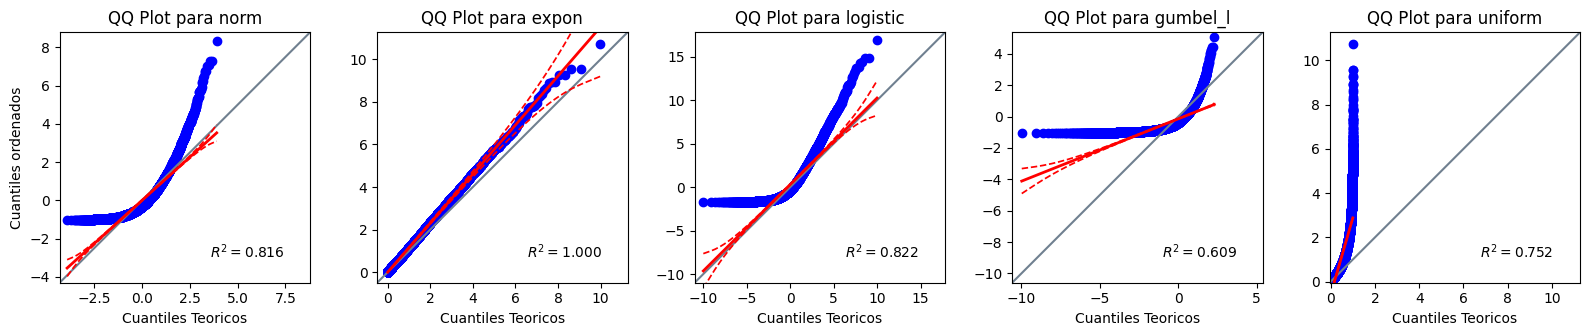

/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:721: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


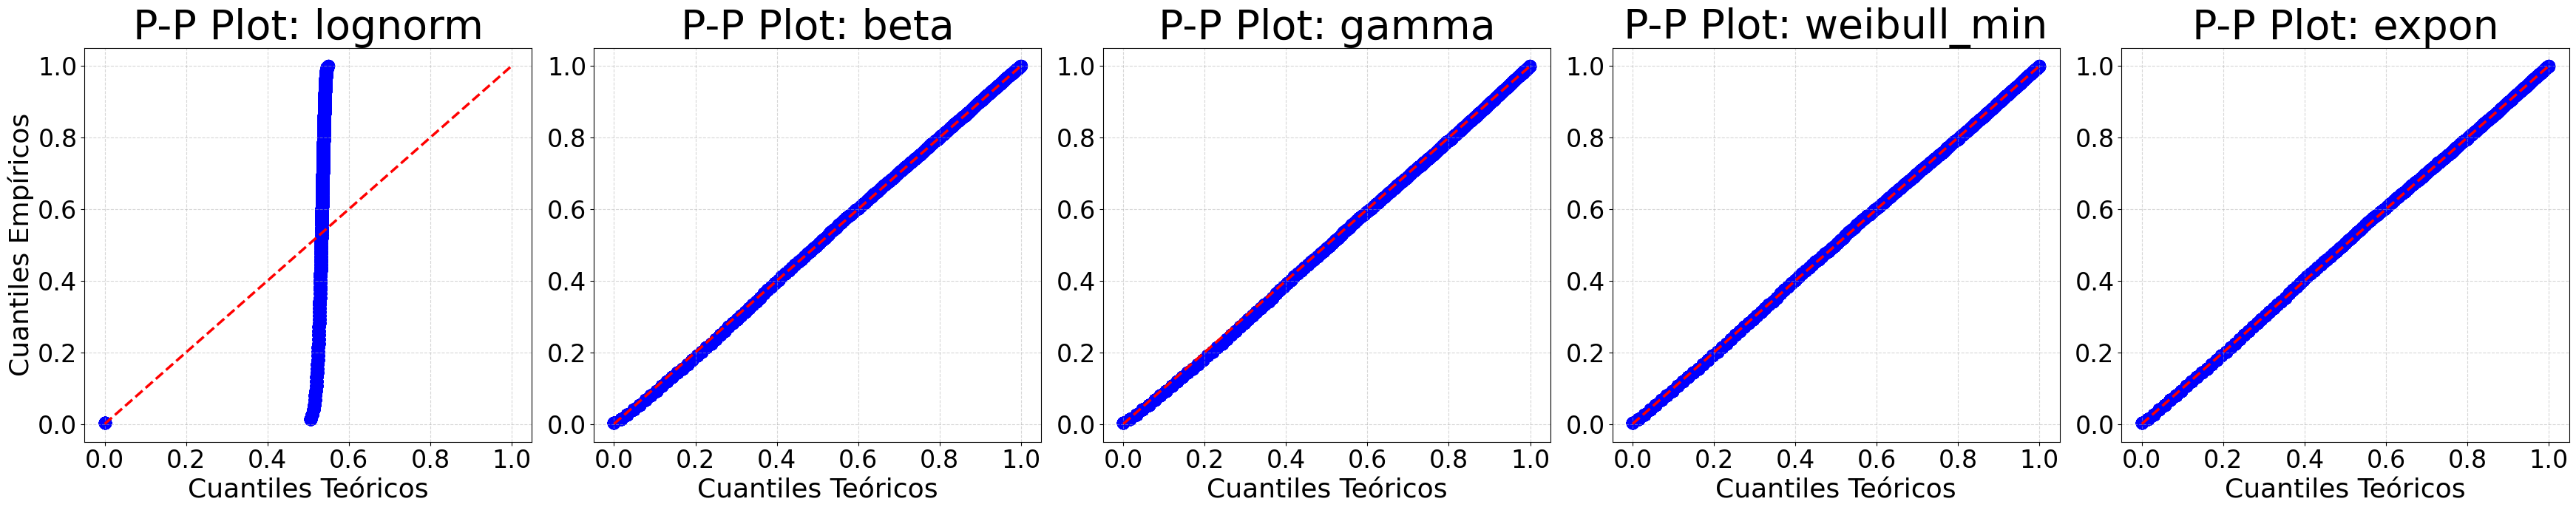

In [ ]:
# @title Tiempo de arribo
dispercion(base,"TA",["Picking Method","Dia Semana"])

#Prueba de independencia
resultados = []
for i in ["Picking Method","Shipping Method","Dia Semana","Hora","Customer ID"]:
  pruebas_independencia(base, i, "TA")
df_resultados = pd.DataFrame(resultados, columns=["Tipo_Prueba",'Test', 'Comparación', 'Chi','Dof', 'p-val', 'Pasa'])
sacar_informacion(df_resultados, "Independencia TA")

#Prueba de homogenenidad
resultados = []
for i in ["Picking Method","Shipping Method","Dia Semana","Hora","Customer ID"]:
  pruebas_homogeneidad(base, i, "TA")
df_resultados = pd.DataFrame(resultados, columns=["Para",'Test', 'Comparación', 'Estadístico', 'p-val', 'Pasa'])
sacar_informacion(df_resultados, "Homogeneidad TA")

#Prueba de homogeneidad primera semana.
filtro = base[base["Order Date"] < pd.to_datetime("2024-12-19")]
resultados = []
for i in ["Picking Method","Shipping Method","Dia Semana","Hora","Customer ID"]:
  pruebas_homogeneidad(filtro, i, "TA")
df_resultados = pd.DataFrame(resultados, columns=["Para",'Test', 'Comparación', 'Estadístico', 'p-val', 'Pasa'])
sacar_informacion(df_resultados, "Homogeneidad TA Primera Semana")

resultados = []
varianza_poblacional = base["TA"].var()
l = 1.666
for i in range(0,7):
  filtro = base[base['Dia Semana'] == i]
  media = filtro["TA"].mean()
  desviacion = filtro["TA"].std()
  varianza = filtro["TA"].var()
  muestras = len(filtro)
  f = (varianza_poblacional/varianza)
  igualdad = f<=l
  pasa = "Si" if igualdad else "No"
  resultados.append([i, media, desviacion, varianza, muestras,f, pasa])
df_resultados = pd.DataFrame(resultados, columns=["Dia Semana","Media","Desviacion Estandar","Varianza","n","Valor F", "Medias Iguales"])
sacar_informacion(df_resultados, "Prueba F Varianzas TA")

#Graficos QQPlot
graficos_QQPLOT(base, "TA")

#Prueba de verosimilitud
resultados = verosimilitudes(base, "TA")
sacar_informacion(resultados, "Verosimilitud TA")

#graficos PP plot
pp_plot(base, "TA",["lognorm","beta","gamma","weibull_min","expon"])

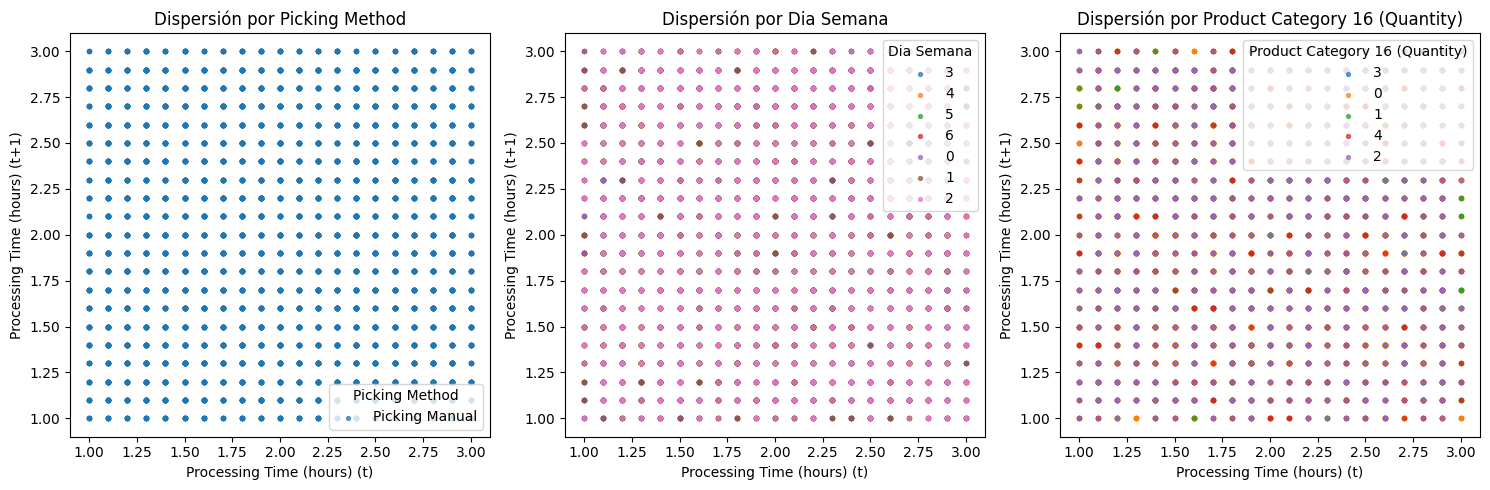

In [ ]:
# @title Tiempo de procesamiento
dispercion(base,"Processing Time (hours)", ["Picking Method","Dia Semana","Product Category 16 (Quantity)"])

In [ ]:
resultados = []
for i in ["Dia Semana","Hora","Customer ID",'Product Category 1 (Quantity)', 'Product Category 2 (Quantity)',
       'Product Category 3 (Quantity)', 'Product Category 4 (Quantity)',
       'Product Category 5 (Quantity)', 'Product Category 6 (Quantity)',
       'Product Category 7 (Quantity)', 'Product Category 8 (Quantity)',
       'Product Category 9 (Quantity)', 'Product Category 10 (Quantity)',
       'Product Category 11 (Quantity)', 'Product Category 12 (Quantity)',
       'Product Category 13 (Quantity)', 'Product Category 14 (Quantity)',
       'Product Category 15 (Quantity)', 'Product Category 16 (Quantity)',
       'Product Category 17 (Quantity)', 'Product Category 18 (Quantity)',"Total Compra"]:
  pruebas_independencia(base, i, "Processing Time (hours)")
df_resultados = pd.DataFrame(resultados, columns=["Tipo_Prueba",'Test', 'Comparación', 'Chi','Dof', 'p-val', 'Pasa'])
sacar_informacion(df_resultados, "Independencia TP")

/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low

In [ ]:
resultados = []
for i in ["Dia Semana","Hora","Customer ID",'Product Category 1 (Quantity)', 'Product Category 2 (Quantity)',
       'Product Category 3 (Quantity)', 'Product Category 4 (Quantity)',
       'Product Category 5 (Quantity)', 'Product Category 6 (Quantity)',
       'Product Category 7 (Quantity)', 'Product Category 8 (Quantity)',
       'Product Category 9 (Quantity)', 'Product Category 10 (Quantity)',
       'Product Category 11 (Quantity)', 'Product Category 12 (Quantity)',
       'Product Category 13 (Quantity)', 'Product Category 14 (Quantity)',
       'Product Category 15 (Quantity)', 'Product Category 16 (Quantity)',
       'Product Category 17 (Quantity)', 'Product Category 18 (Quantity)',"Total Compra"]:
  pruebas_homogeneidad(base, i, "Processing Time (hours)")
df_resultados = pd.DataFrame(resultados, columns=["Para",'Test', 'Comparación', 'Estadístico', 'p-val', 'Pasa'])
sacar_informacion(df_resultados, "Homogeneidad TP")

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:3061: RuntimeWarning: divide by zero encountered in divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


In [ ]:
resultados = []
media_poblacion = base["Processing Time (hours)"].mean()
l_s = 1.645
l_i = -1.645
for i in range(0,5):
  filtro = base[base['Product Category 16 (Quantity)'] == i]
  media = filtro["Processing Time (hours)"].mean()
  desviacion = filtro["Processing Time (hours)"].std()
  varianza = filtro["Processing Time (hours)"].var()
  muestras = len(filtro)
  z = (media-media_poblacion)/(desviacion/sqrt(muestras))
  igualdad = z>=l_i and z<=l_s
  pasa = "Si" if igualdad else "No"
  resultados.append([i, media, desviacion, varianza, muestras,z, pasa])
df_resultados = pd.DataFrame(resultados, columns=["Cantidad","Media","Desviacion Estandar","Varianza","n","Valor Z", "Medias Iguales"])
sacar_informacion(df_resultados, "Prueba Z Medias TP")

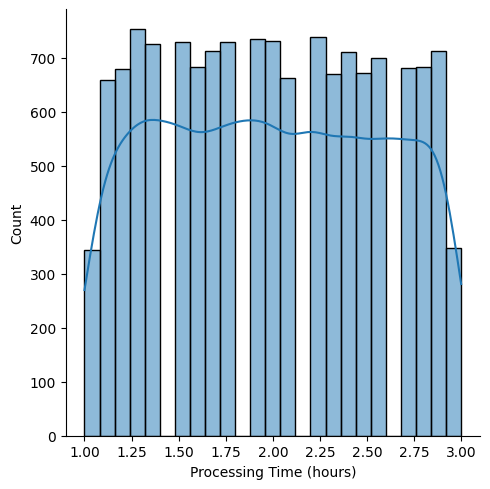

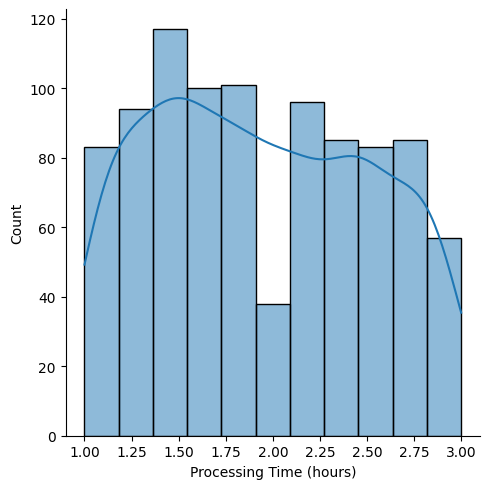

In [ ]:
for i in [[0,1,2,3],[4]]:
  filtro = base[base['Product Category 16 (Quantity)'].isin(i)]
  sns.displot(data=filtro,x="Processing Time (hours)",kde=True)

In [ ]:
filtro = base[base["Product Category 16 (Quantity)"] == 4]
media_poblacion = filtro["Processing Time (hours)"].mean()
l_s = 1.645
l_i = -1.645
resultados = []
for i in ['Product Category 1 (Quantity)', 'Product Category 2 (Quantity)',
       'Product Category 3 (Quantity)', 'Product Category 4 (Quantity)',
       'Product Category 5 (Quantity)', 'Product Category 6 (Quantity)', 'Product Category 7 (Quantity)', 'Product Category 8 (Quantity)',
       'Product Category 9 (Quantity)', 'Product Category 10 (Quantity)',
       'Product Category 11 (Quantity)', 'Product Category 12 (Quantity)', 'Product Category 13 (Quantity)', 'Product Category 14 (Quantity)',
       'Product Category 15 (Quantity)','Product Category 17 (Quantity)', 'Product Category 18 (Quantity)']:
  for j in filtro[i].unique():
    filtro2 = filtro[filtro[i] == j]
    media = filtro2["Processing Time (hours)"].mean()
    desviacion = filtro2["Processing Time (hours)"].std()
    varianza = filtro2["Processing Time (hours)"].var()
    muestras = len(filtro2)
    z = (media-media_poblacion)/(desviacion/sqrt(muestras))
    igualdad = z>=l_i and z<=l_s
    pasa = "Si" if igualdad else "No"
    resultados.append([i, j, media, desviacion, varianza, muestras,z, pasa])
df_resultados = pd.DataFrame(resultados, columns=["Variable","Cantidad","Media","Desviacion Estandar","Varianza","n","Valor Z", "Medias Iguales"])
sacar_informacion(df_resultados, "Medias TP C16")

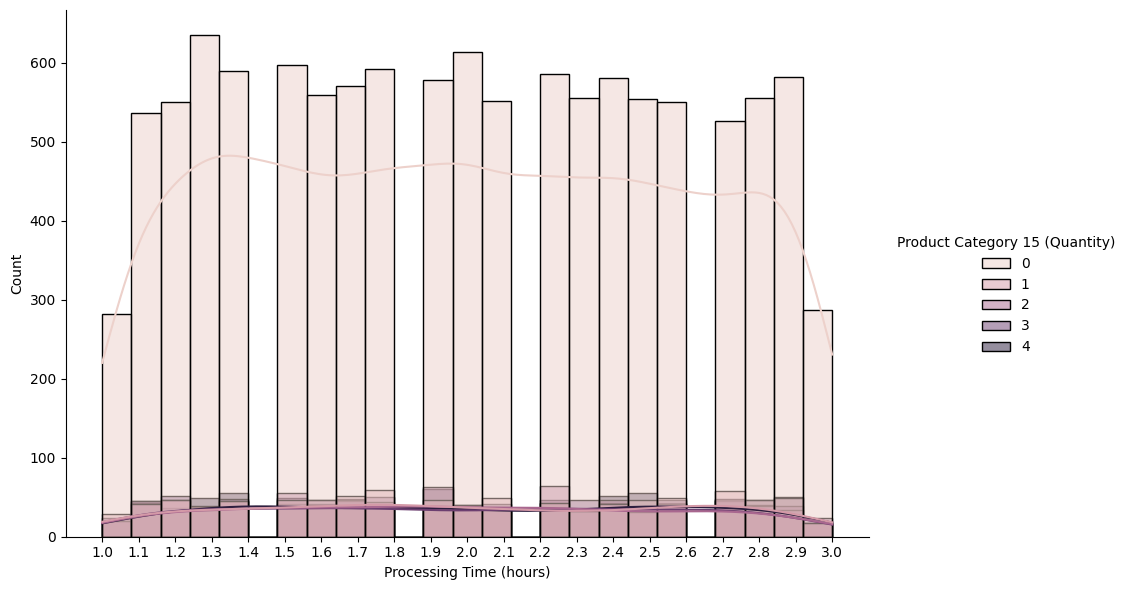

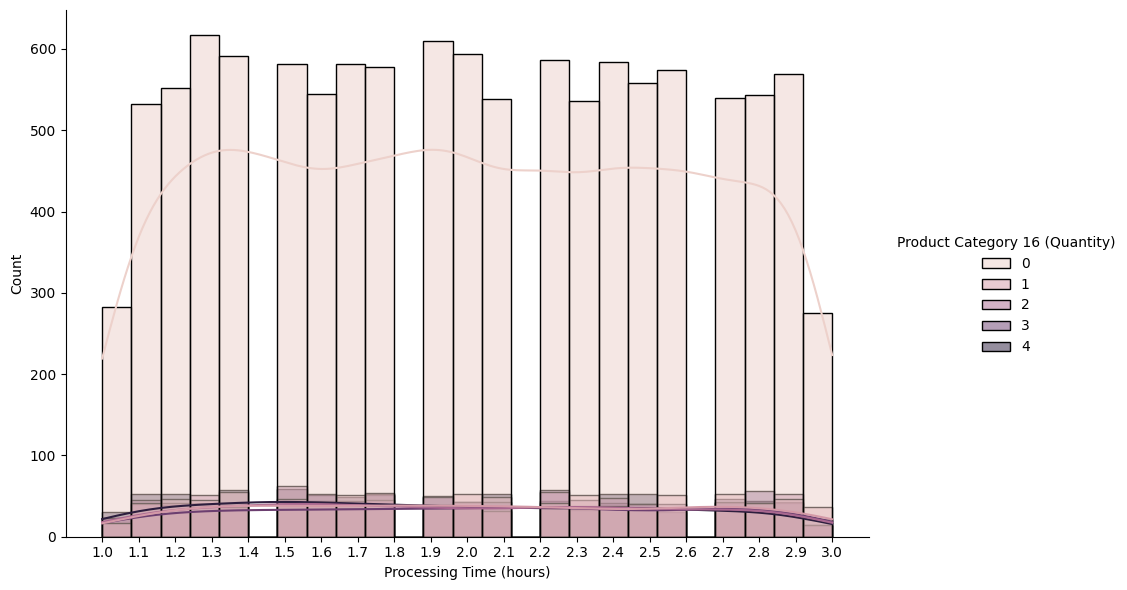

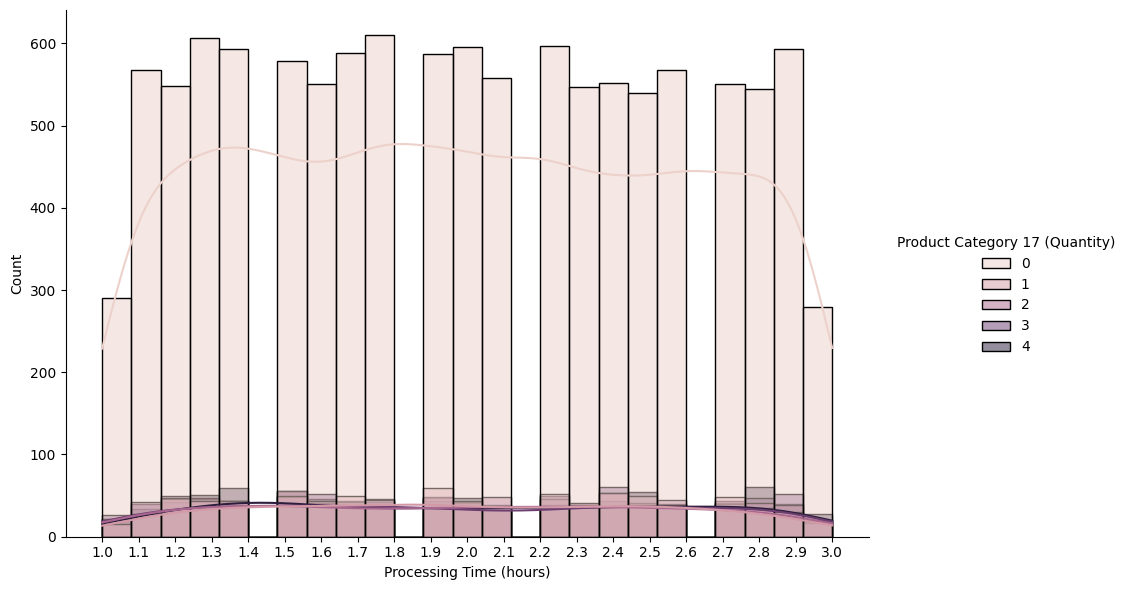

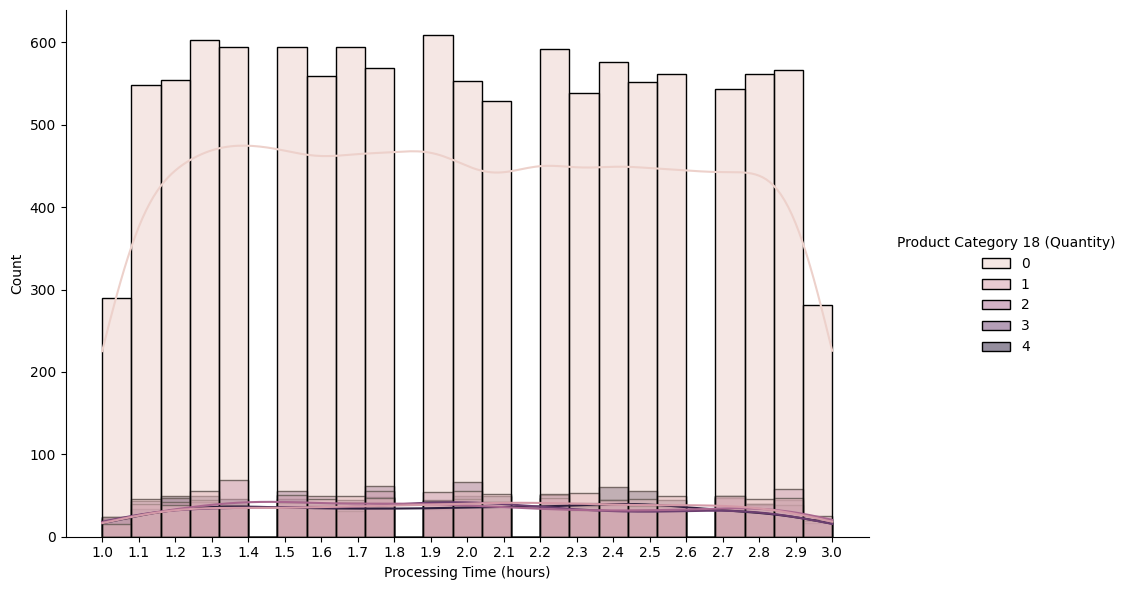

In [ ]:

for i in ["Product Category 15 (Quantity)","Product Category 16 (Quantity)","Product Category 17 (Quantity)","Product Category 18 (Quantity)"]:
  sns.displot(data=base,x="Processing Time (hours)", hue=i ,kde=True,height=6, aspect=1.5)
  plt.xticks(np.arange(1, 3.1, 0.1))

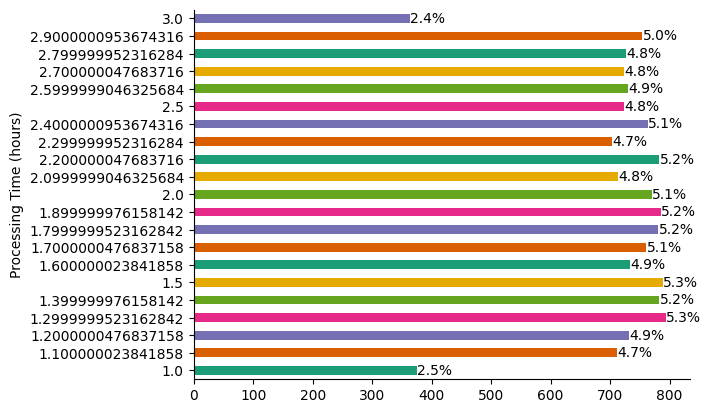

In [ ]:
counts = base.groupby('Processing Time (hours)').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

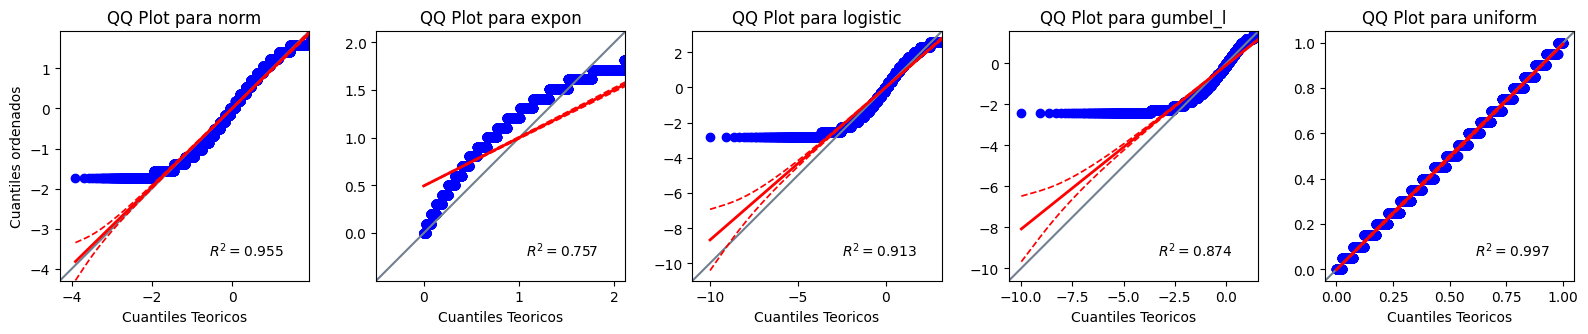

In [ ]:
graficos_QQPLOT(base, "Processing Time (hours)")

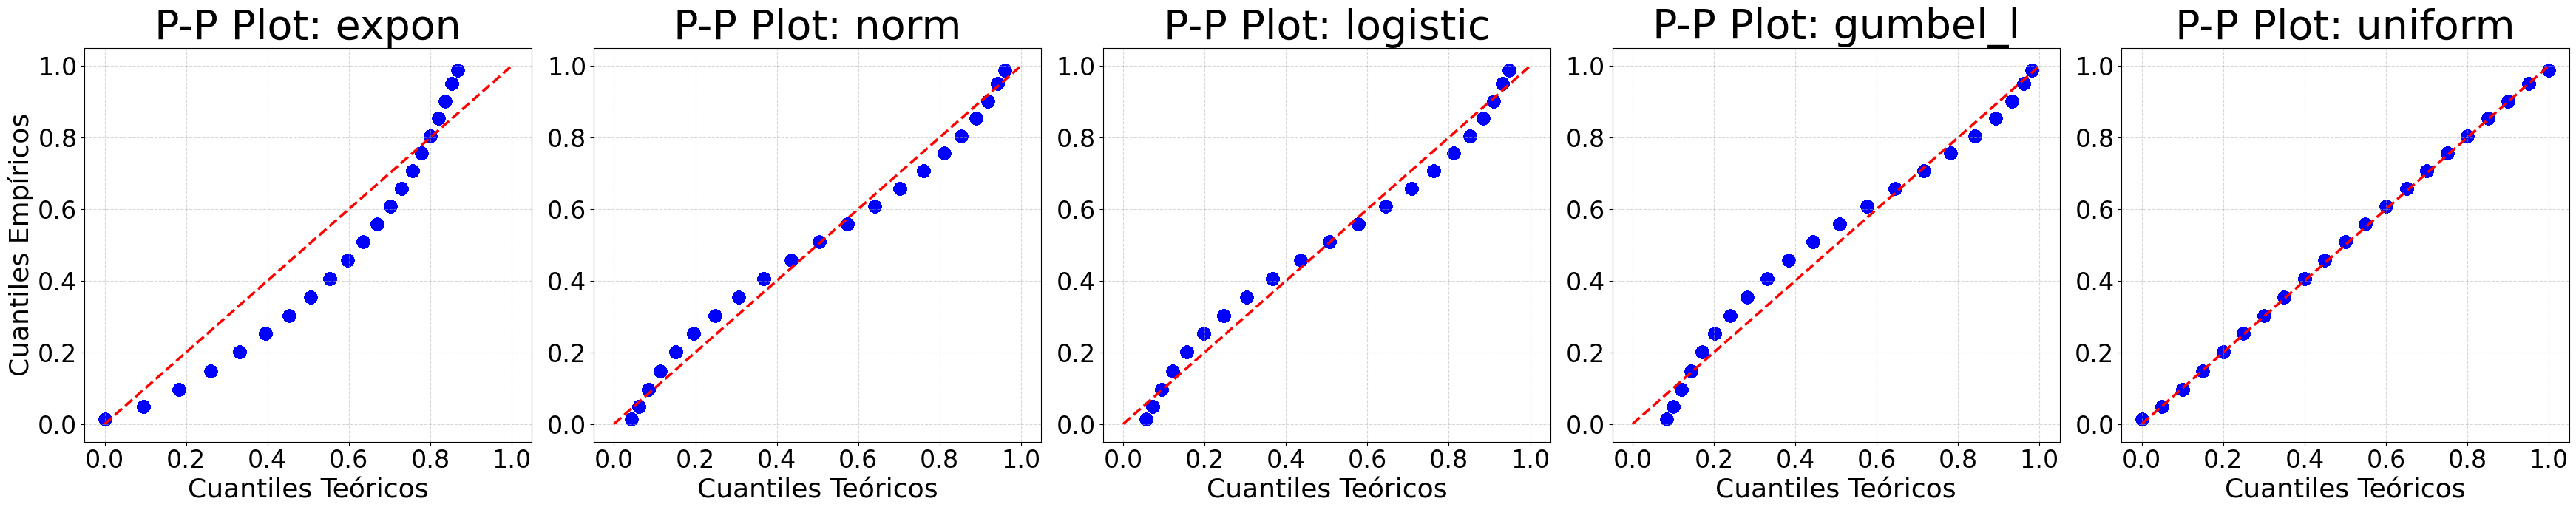

In [ ]:
pp_plot(base, "Processing Time (hours)",["expon","norm","logistic","gumbel_l","uniform"])

In [ ]:
resultados = []
for i in ["Dia Semana","Hora","Customer ID",'Product Category 1 (Quantity)', 'Product Category 2 (Quantity)',
       'Product Category 3 (Quantity)', 'Product Category 4 (Quantity)',
       'Product Category 5 (Quantity)', 'Product Category 6 (Quantity)',
       'Product Category 7 (Quantity)', 'Product Category 8 (Quantity)',
       'Product Category 9 (Quantity)', 'Product Category 10 (Quantity)',
       'Product Category 11 (Quantity)', 'Product Category 12 (Quantity)',
       'Product Category 13 (Quantity)', 'Product Category 14 (Quantity)',
       'Product Category 15 (Quantity)', 'Product Category 16 (Quantity)',
       'Product Category 17 (Quantity)', 'Product Category 18 (Quantity)',"Total Compra"]:
  pruebas_independencia(base, i, "Product Category 1 (Quantity)")
df_resultados = pd.DataFrame(resultados, columns=["Tipo_Prueba",'Test', 'Comparación', 'Chi','Dof', 'p-val', 'Pasa'])
sacar_informacion(df_resultados,"PC1 Independencia")

/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low

In [ ]:
resultados = []
for i in ["Dia Semana","Hora","Customer ID",'Product Category 1 (Quantity)', 'Product Category 2 (Quantity)',
       'Product Category 3 (Quantity)', 'Product Category 4 (Quantity)',
       'Product Category 5 (Quantity)', 'Product Category 6 (Quantity)',
       'Product Category 7 (Quantity)', 'Product Category 8 (Quantity)',
       'Product Category 9 (Quantity)', 'Product Category 10 (Quantity)',
       'Product Category 11 (Quantity)', 'Product Category 12 (Quantity)',
       'Product Category 13 (Quantity)', 'Product Category 14 (Quantity)',
       'Product Category 15 (Quantity)', 'Product Category 16 (Quantity)',
       'Product Category 17 (Quantity)', 'Product Category 18 (Quantity)',"Total Compra"]:
  pruebas_independencia(base, i, "Product Category 2 (Quantity)")
df_resultados = pd.DataFrame(resultados, columns=["Tipo_Prueba",'Test', 'Comparación', 'Chi','Dof', 'p-val', 'Pasa'])
df_resultados[df_resultados["Pasa"] == "No"]

/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low

Tipo_Prueba            Test  \
3   Independencia         pearson   
4   Independencia    cressie-read   
5   Independencia  log-likelihood   
8   Independencia  log-likelihood   
12  Independencia         pearson   
13  Independencia    cressie-read   
14  Independencia  log-likelihood   
15  Independencia         pearson   
16  Independencia    cressie-read   
17  Independencia  log-likelihood   
18  Independencia         pearson   
19  Independencia    cressie-read   
20  Independencia  log-likelihood   
48  Independencia         pearson   
49  Independencia    cressie-read   
50  Independencia  log-likelihood   
63  Independencia         pearson   
64  Independencia    cressie-read   
65  Independencia  log-likelihood   

                                          Comparación            Chi     Dof  \
3               Hora vs Product Category 2 (Quantity)     279.025008   230.0   
4               Hora vs Product Category 2 (Quantity)     277.948211   230.0   
5               Hora vs Product Category 2 (Quantity)     276.699247   230.0   
8        Customer ID vs Product Category 2 (Quantity)   11531.455904  9990.0   
12  Product Category 2 (Quantity) vs Product Categ...  150000.000000   100.0   
13  Product Category 2 (Quantity) vs Product Categ...  106532.777131   100.0   
14  Product Category 2 (Quantity) vs Product Categ...   71925.156735   100.0   
15  Product Category 3 (Quantity) vs Product Categ...     269.426957   230.0   
16  Product Category 3 (Quantity) vs Product Categ...     268.955931   230.0   
17  Product Category 3 (Quantity) vs Product Categ...     268.815499   230.0   
18  Product Category 4 (Quantity) vs Product Categ...     104.183178    80.0   
19  Product Category 4 (Quantity) vs Product Categ...     104.333182    80.0   
20  Product Category 4 (Quantity) vs Product Categ...     104.721824    80.0   
48  Product Category 14 (Quantity) vs Product Cate...     127.476596   100.0   
49  Product Category 14 (Quantity) vs Product Cate...     127.368997   100.0   
50  Product Category 14 (Quantity) vs Product Cate...     127.336531   100.0   
63      Total Compra vs Product Category 2 (Quantity)    1720.501585   850.0   
64      Total Compra vs Product Category 2 (Quantity)    1685.130557   850.0   
65      Total Compra vs Product Category 2 (Quantity)    1736.463627   850.0   

           p-val Pasa  
3   1.494361e-02   No  
4   1.669538e-02   No  
5   1.895107e-02   No  
8   1.311985e-25   No  
12  0.000000e+00   No  
13  0.000000e+00   No  
14  0.000000e+00   No  
15  3.808835e-02   No  
16  3.975549e-02   No  
17  4.026424e-02   No  
18  3.601900e-02   No  
19  3.523874e-02   No  
20  3.328470e-02   No  
48  3.324425e-02   No  
49  3.372710e-02   No  
50  3.387397e-02   No  
63  2.498458e-61   No  
64  1.828677e-57   No  
65  4.248445e-63   No

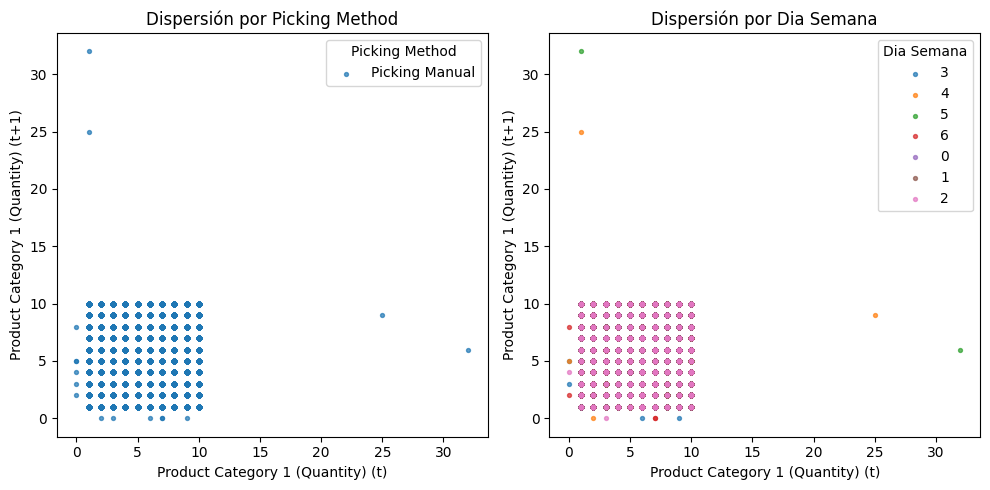

In [ ]:
dispercion(base,"Product Category 1 (Quantity)",["Picking Method", "Dia Semana"])

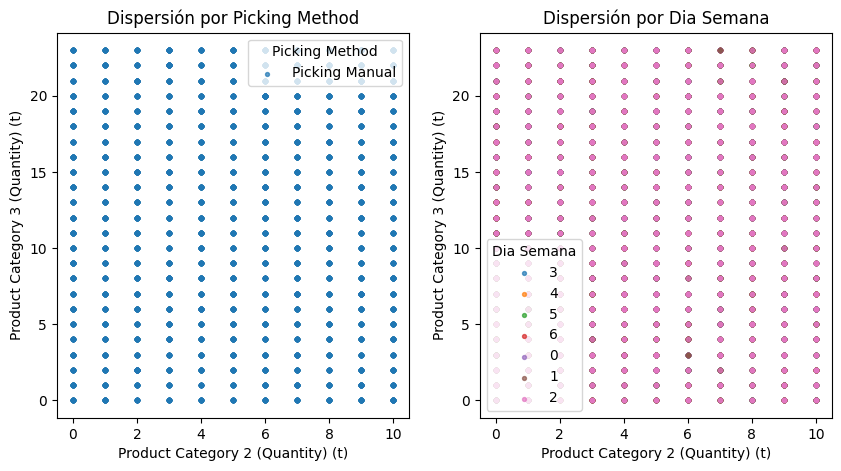

In [ ]:
dispercionDependencia(base, "Product Category 2 (Quantity)", "Product Category 3 (Quantity)", ["Picking Method", "Dia Semana"])

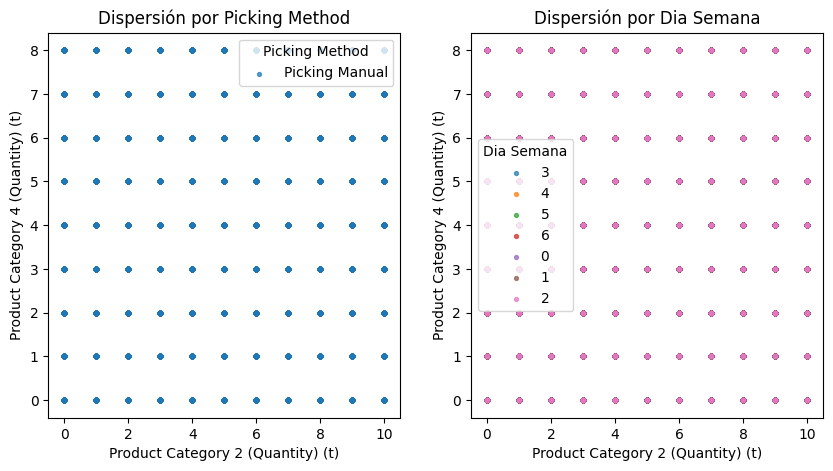

In [ ]:
dispercionDependencia(base, "Product Category 2 (Quantity)", "Product Category 4 (Quantity)", ["Picking Method", "Dia Semana"])

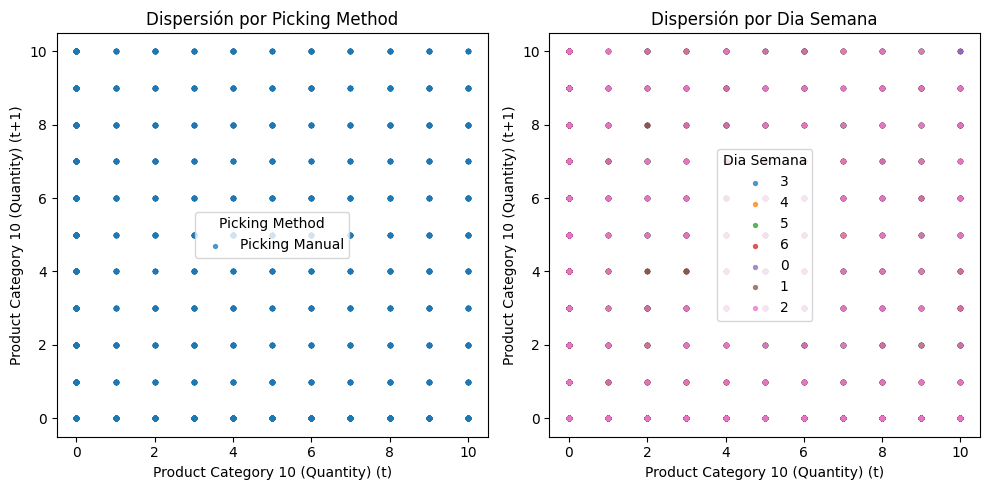

In [ ]:
dispercion(base,"Product Category 10 (Quantity)",["Picking Method", "Dia Semana"])

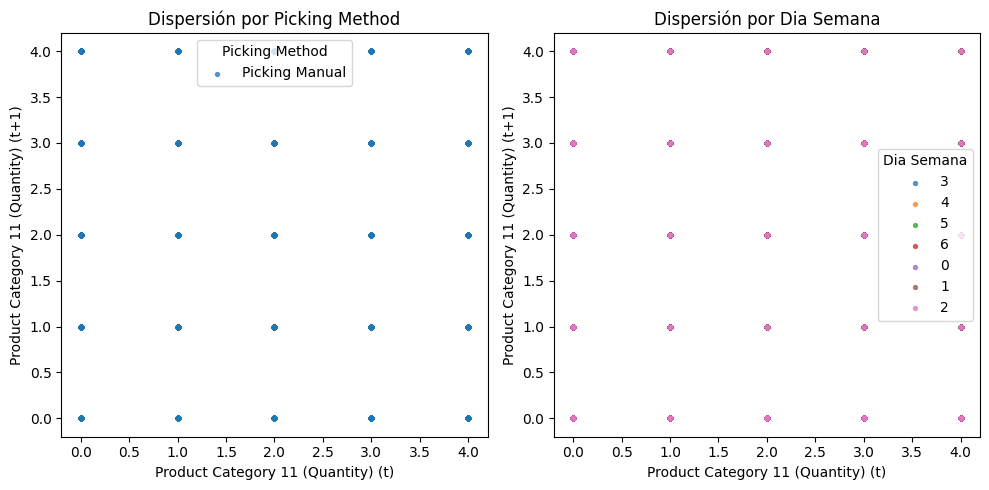

In [ ]:
dispercion(base,"Product Category 11 (Quantity)",["Picking Method", "Dia Semana"])

In [ ]:
sacar_informacion(base.groupby("Customer ID")["Customer ID"].count().describe().reset_index(),"Customer ID info")

In [ ]:
filtro = base.groupby("Customer ID").agg(
    Cantidad=("Processing Time (hours)", "count"),  # Contar los valores de "TP"
    CantidadProductosPromedio=("Total Compra", "mean"),  # Promedio de "Total Compra"
    TotalProductosCompra = ("Total Compra", "sum"),  # Suma de "Total Compra"
    TiempoProcesamientoPromedio=("Processing Time (hours)", "mean"),  # Promedio de "Processing Time (hours)"
    TotalTiempoProcesamiento=("Processing Time (hours)", "sum")  # Suma de "Processing Time (hours)"
).reset_index()
filtro["Ocupacion"] = filtro["TotalTiempoProcesamiento"].apply(lambda x: x/(40*(12/7)))
filtro["Libre"] = 1-filtro["Ocupacion"]
filtro["Picks/Hora"] = filtro["Cantidad"]/(40*(12/7))
sacar_informacion(filtro, "Datos Customers")

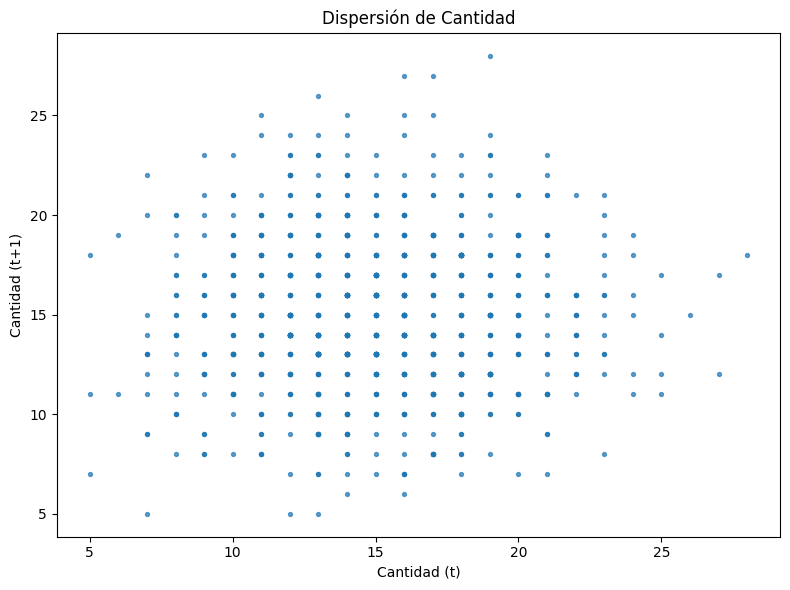

In [ ]:
dispercionUnica(filtro,"Cantidad")

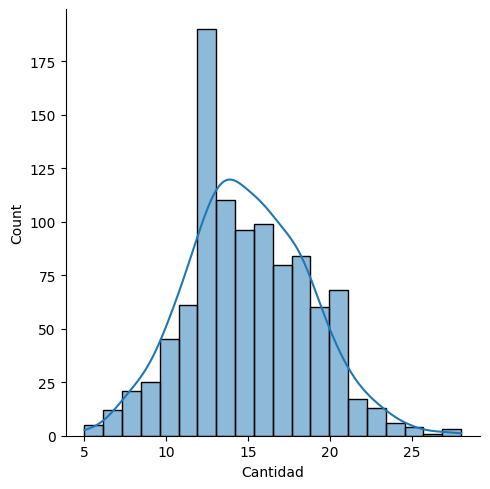

In [ ]:
sns.displot(data=filtro,x="Cantidad",kde=True)

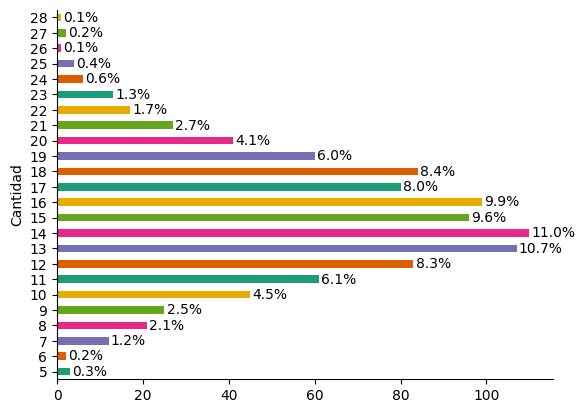

In [ ]:
counts = filtro.groupby('Cantidad').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
sacar_informacion(base[base["Customer ID"] == "CUST447"],"Zoom CUST447")
sacar_informacion(base[base["Customer ID"] == "CUST926"],"Zoom CUST926")
sacar_informacion(base[base["Customer ID"] == "CUST471"],"Zoom CUST471")
sacar_informacion(base[base["Customer ID"] == "CUST017"],"Zoom CUST017")
sacar_informacion(base[base["Customer ID"] == "CUST807"],"Zoom CUST807")
sacar_informacion(base[base["Customer ID"] == "CUST030"],"Zoom CUST030")
sacar_informacion(base[base["Customer ID"] == "CUST514"],"Zoom CUST514")
sacar_informacion(base[base["Customer ID"] == "CUST286"],"Zoom CUST286")

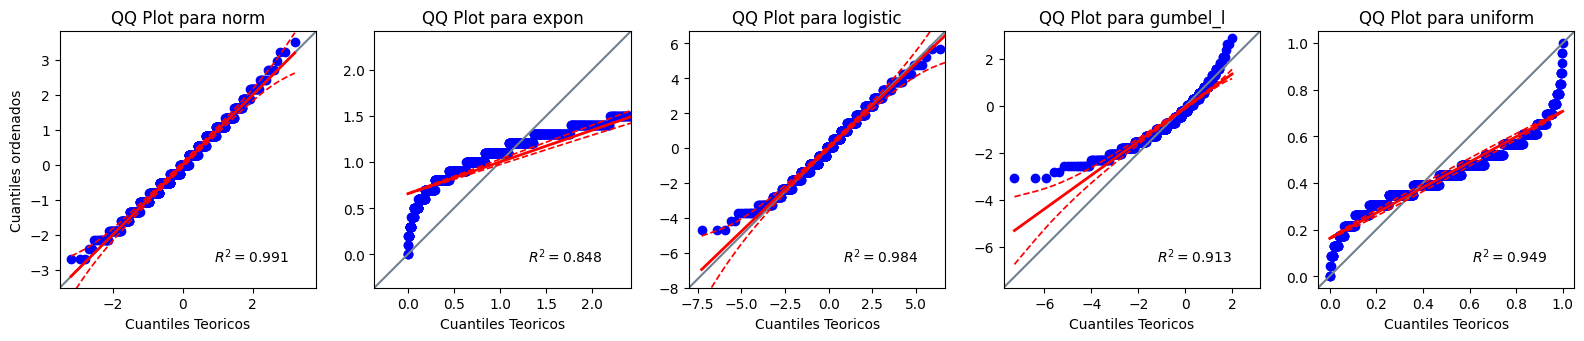

In [ ]:
graficos_QQPLOT(filtro, "Cantidad")

In [ ]:
verosimilitudes(filtro, "Cantidad")

Distribución          AIC          BIC  Parámetros (k)  \
0        gamma  5462.666793  5477.390059               3   
1      lognorm  5462.742500  5477.465766               3   
2         beta  5464.371612  5484.002633               4   
3         norm  5466.980347  5476.795857               2   
4  weibull_min  5467.577763  5482.301029               3   
5     logistic  5487.164679  5496.980190               2   
6      uniform  6274.988432  6284.803942               2   
7        expon  6609.170186  6618.985697               2   

                                          Parámetros  Log-Verosimilitud  
0  (99.75653410059752, -22.118333457034222, 0.372...       -2728.333397  
1  (0.06616936602862458, -41.101324698952624, 55....       -2728.371250  
2  (21.27123420674085, 46.33418215299589, -5.8542...       -2728.185806  
3                         (15.0, 3.7156426092938486)       -2731.490173  
4  (3.229733336054066, 3.95536717428047, 12.31496...       -2730.788881  
5            (14.935148848055933, 2.127490470781242)       -2741.582339  
6                                        (5.0, 23.0)       -3135.494216  
7                                        (5.0, 10.0)       -3302.585093

In [ ]:
base["ID"] = base["Customer ID"].apply(lambda x: x.replace("CUST",""))
base["ID"] = base["ID"].astype(int)

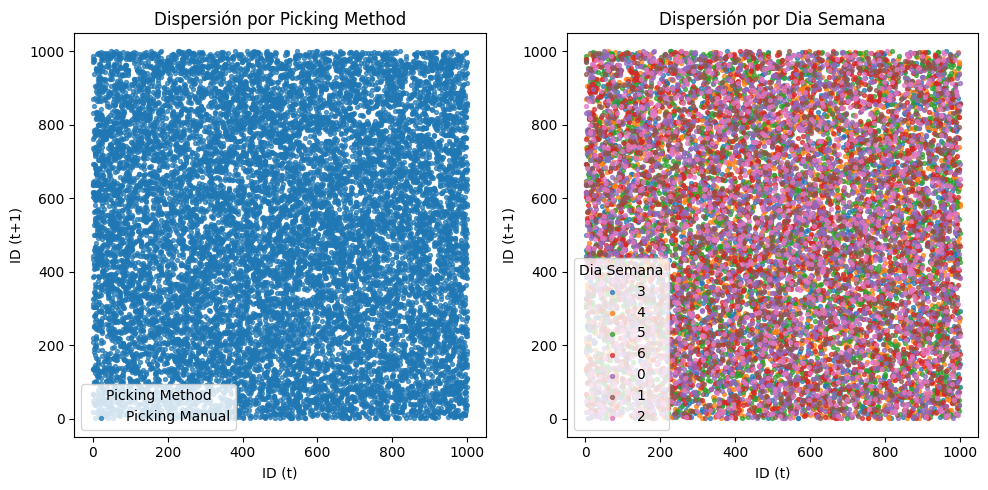

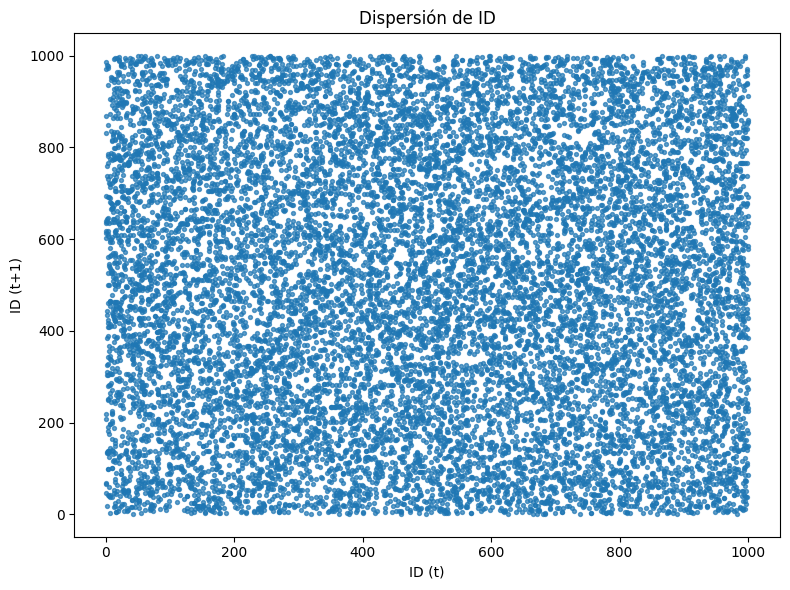

In [ ]:
dispercion(base,"ID",["Picking Method","Dia Semana"])
dispercionUnica(base,"ID")

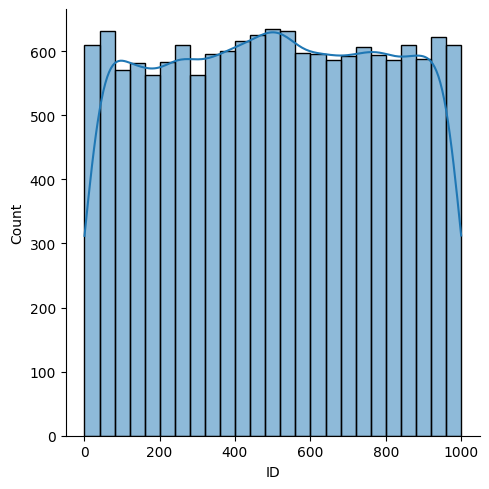

In [ ]:
sns.displot(data=base,x="ID",kde=True)

In [ ]:
resultados = []
for i in ["Dia Semana", "Hora", "Total Compra"]:
  pruebas_independencia(base, "ID", i)
df_resultados = pd.DataFrame(resultados, columns=["Tipo_Prueba",'Test', 'Comparación', 'Chi','Dof', 'p-val', 'Pasa'])
sacar_informacion(df_resultados,"Independencia Cliente")

/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)
/usr/local/lib/python3.11/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low

In [ ]:
resultados = []
for i in ["Dia Semana", "Hora", "Total Compra"]:
  pruebas_homogeneidad(base, "ID", i)
df_resultados = pd.DataFrame(resultados, columns=["Para",'Test', 'Comparación', 'Estadístico', 'p-val', 'Pasa'])
sacar_informacion(df_resultados,"Homogeneidad Cliente")

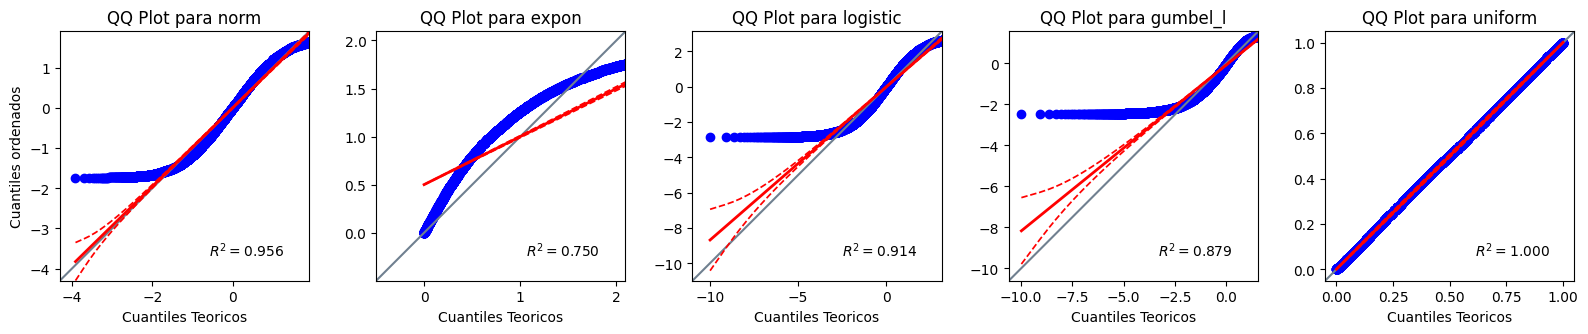

In [ ]:
graficos_QQPLOT(base, "ID")

In [ ]:
sacar_informacion(verosimilitudes(base, "ID"),"Verosimilitud Cliente")


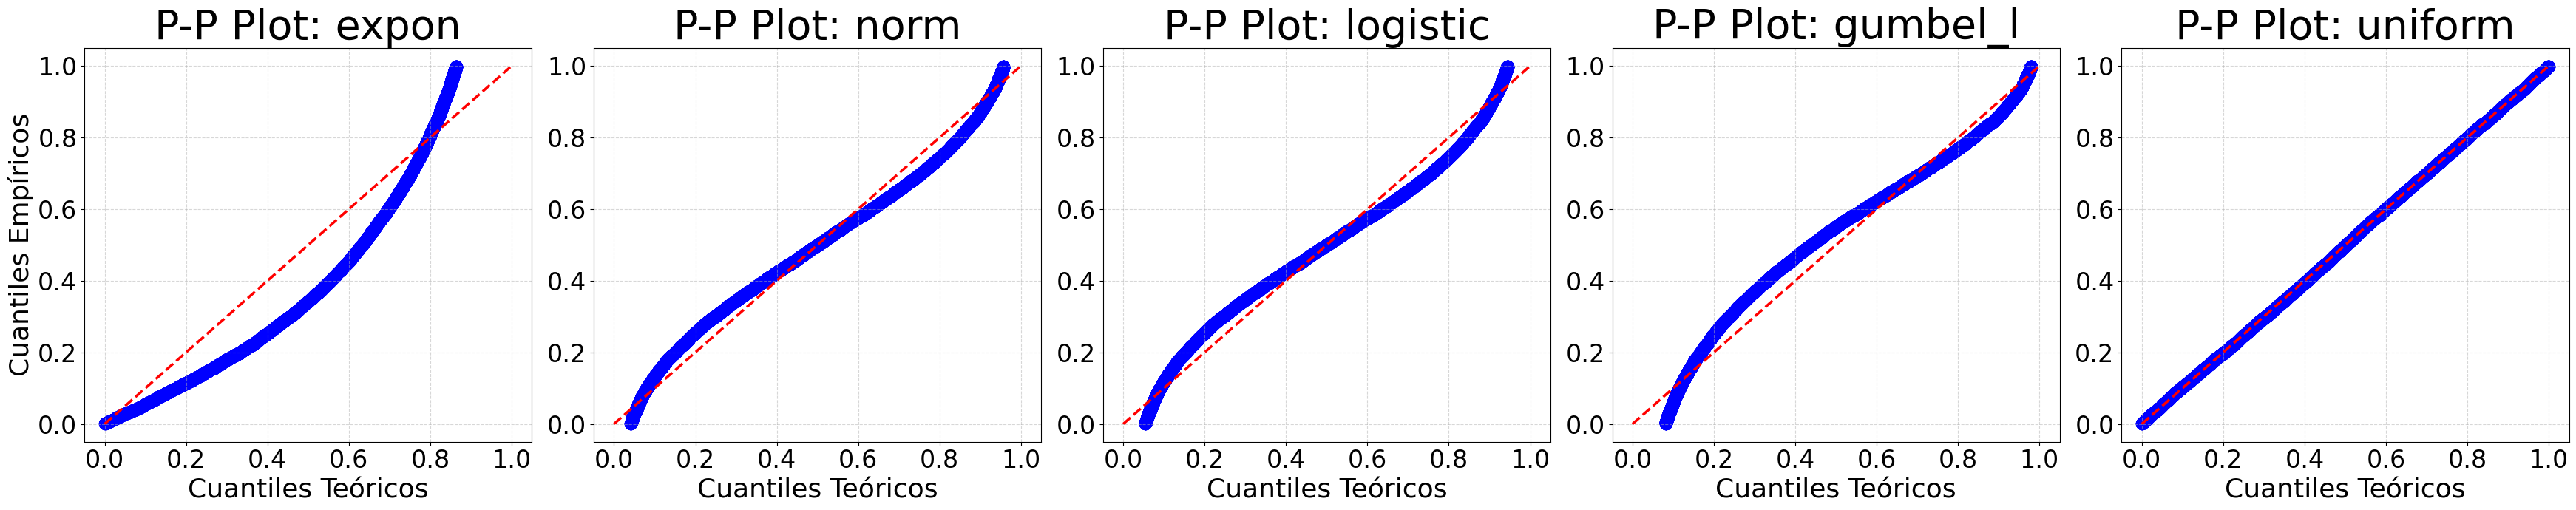

In [ ]:
pp_plot(base, "ID",["expon","norm","logistic","gumbel_l","uniform"])

In [ ]:
datos = pd.read_excel("Caso 2024 Walmart.xlsx")
datos.drop_duplicates("Order Date")

Order ID Order Date Unnamed: 2 Customer ID  \
0   ORD000001 2024-12-22   05:17:45     CUST534   
2   ORD000003 2024-12-19   07:48:38     CUST469   
3   ORD000004 2024-12-12   05:02:33     CUST911   
4   ORD000005 2024-12-13   01:33:11     CUST576   
6   ORD000007 2024-12-14   08:57:44     CUST713   
7   ORD000008 2024-12-23   04:41:40     CUST262   
8   ORD000009 2024-12-15   15:17:22     CUST562   
12  ORD000013 2024-12-18   19:07:43     CUST597   
29  ORD000030 2024-12-16   05:09:55     CUST122   
31  ORD000032 2024-12-20   20:13:56     CUST966   
37  ORD000038 2024-12-21   19:57:14     CUST932   
41  ORD000042 2024-12-17   11:28:55     CUST075   

    Product Category 1 (Quantity)  Product Category 2 (Quantity)  \
0                               4                              7   
2                               7                              6   
3                               7                              9   
4                               2                              6   
6                               7                              2   
7                               4                              7   
8                               0                              1   
12                              1                              6   
29                              4                              3   
31                             10                              6   
37                              4                              9   
41                              8                              1   

    Product Category 3 (Quantity)  Product Category 4 (Quantity)  \
0                               3                              3   
2                              23                              8   
3                              21                              5   
4                               5                              1   
6                              13                              2   
7                              23                              8   
8                              16                              0   
12                             20                              4   
29                             18                              4   
31                             15                              2   
37                              3                              6   
41                             13                              6   

    Product Category 5 (Quantity)  Product Category 6 (Quantity)  ...  \
0                               7                              6  ...   
2                               8                              0  ...   
3                               1                              3  ...   
4                               5                              4  ...   
6                               2                              0  ...   
7                               4                              4  ...   
8                               7                              1  ...   
12                              4                              0  ...   
29                              0                              6  ...   
31                              1                              0  ...   
37                              4                              1  ...   
41                              8                              5  ...   

    Product Category 14 (Quantity)  Product Category 15 (Quantity)  \
0                                2                               3   
2                                6                               0   
3                                6                               0   
4                                0                               2   
6                                5                               0   
7                                7                               0   
8                               10                               0   
12                               4                           

In [ ]:
datos.groupby("Order Date")["Customer ID"].count()

Order Date
2024-12-12    1211
2024-12-13    1238
2024-12-14    1244
2024-12-15    1282
2024-12-16    1215
2024-12-17    1242
2024-12-18    1259
2024-12-19    1206
2024-12-20    1262
2024-12-21    1323
2024-12-22    1293
2024-12-23    1225
Name: Customer ID, dtype: int64

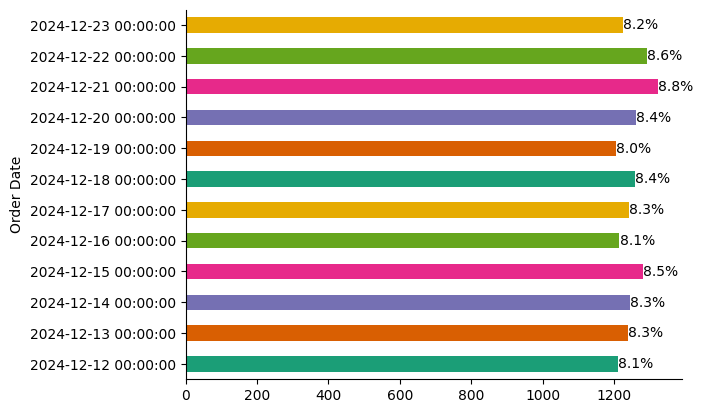

In [ ]:
counts = datos.groupby('Order Date').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

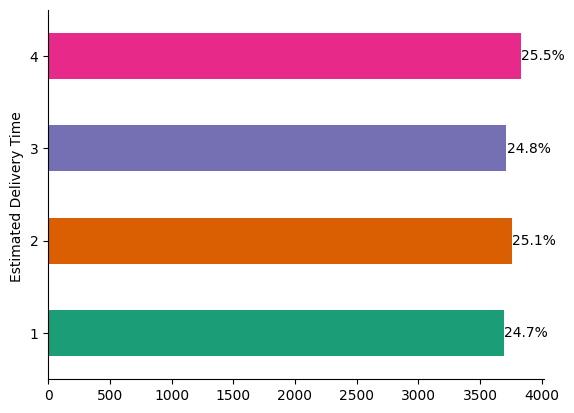

In [ ]:
counts = base.groupby('Estimated Delivery Time ').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

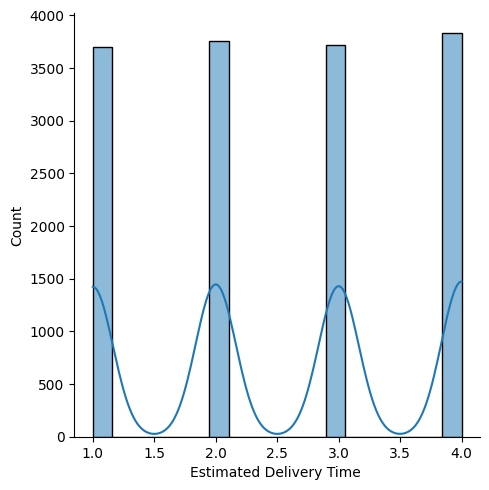

In [ ]:
sns.displot(base,x="Estimated Delivery Time ",kde=True)

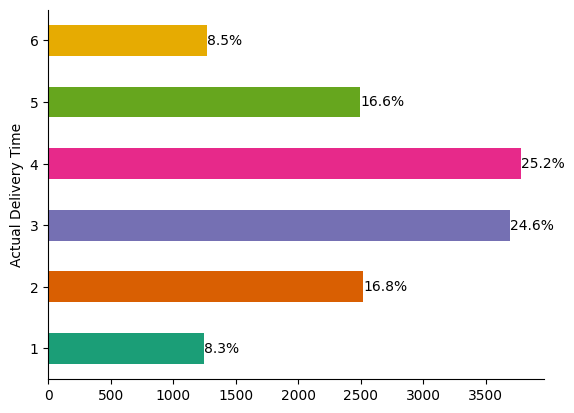

In [ ]:
counts = base.groupby('Actual Delivery Time').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

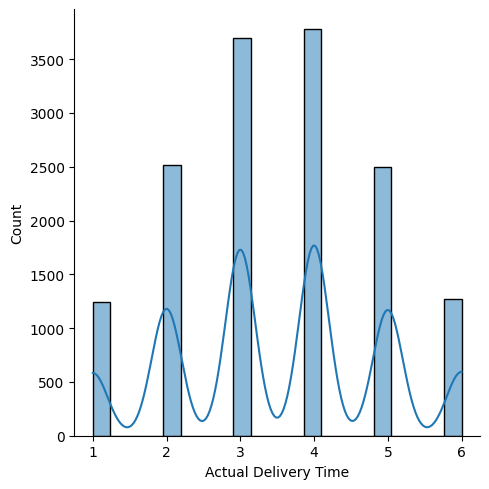

In [ ]:
sns.displot(base,x="Actual Delivery Time",kde=True)